In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Exploratory Data Analysis

In [161]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [162]:
if 'Education' in df.columns:
    le = LabelEncoder()
    df['Education'] = le.fit_transform(df['Education'])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    int64  
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 47.0 KB


In [164]:
print(df.isnull().sum())

Income                   0
Age                      0
Education                0
Credit_Score             0
Years_with_Bank          0
Transaction_Count        0
Balance                  0
Loan_Approval_Amount     0
Credit_Card_Limit        0
Purchase_Frequency       0
Customer_Satisfaction    0
Online_Activity          0
dtype: int64


In [165]:
df.describe()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,1.432000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,1.109883,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,0.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,0.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,1.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,2.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,3.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [166]:


import matplotlib.pyplot as plt
import seaborn as sns







/var/folders/1_/s2l7xzk16451q7xfn62r1s440000gn/T/ipykernel_3804/2810576353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Satisfaction', data=df, palette='Blues')


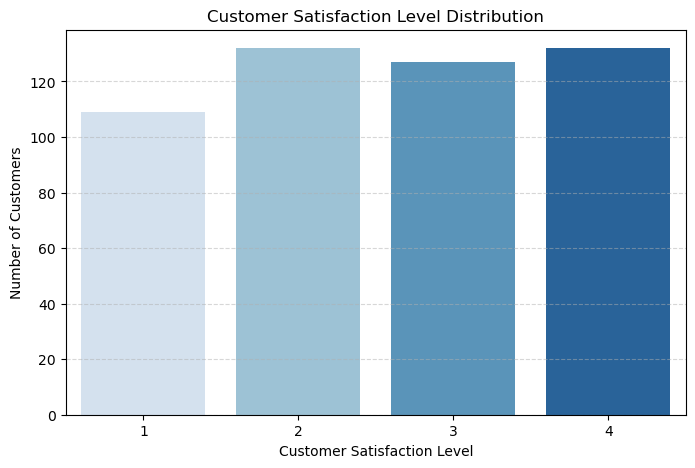

In [167]:
# 1️⃣ Barplot – Customer Satisfaction Distribution
plt.figure(figsize=(8,5))
if 'Customer_Satisfaction' in df.columns:
	sns.countplot(x='Customer_Satisfaction', data=df, palette='Blues')
else:
	print("Column 'Customer_Satisfaction' does not exist in the DataFrame.")
plt.title('Customer Satisfaction Level Distribution')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

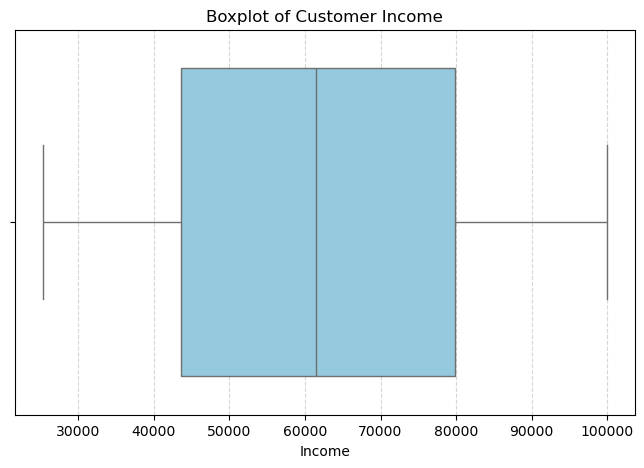

In [168]:
# 2️⃣ Boxplot – Identify Outliers in Income
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Income'], color='skyblue')
plt.title('Boxplot of Customer Income')
plt.xlabel('Income')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


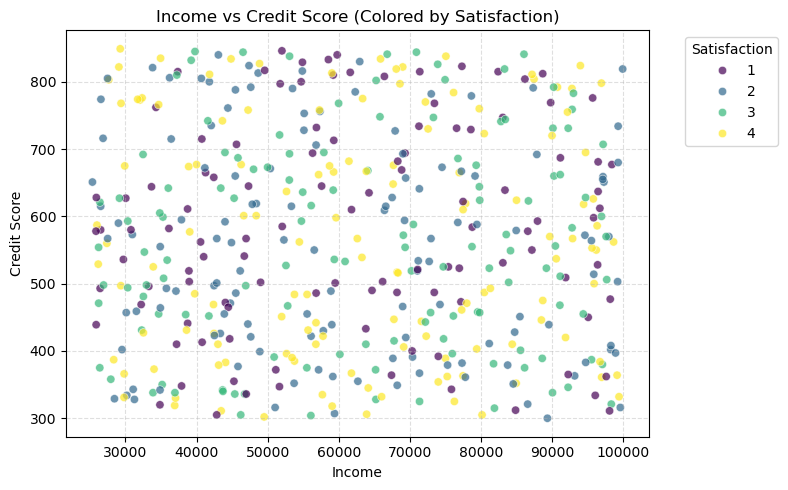

In [169]:
# 3️⃣ Scatterplot – Income vs Credit Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Income', y='Credit_Score', data=df, hue='Customer_Satisfaction', palette='viridis', alpha=0.7)
plt.title('Income vs Credit Score (Colored by Satisfaction)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

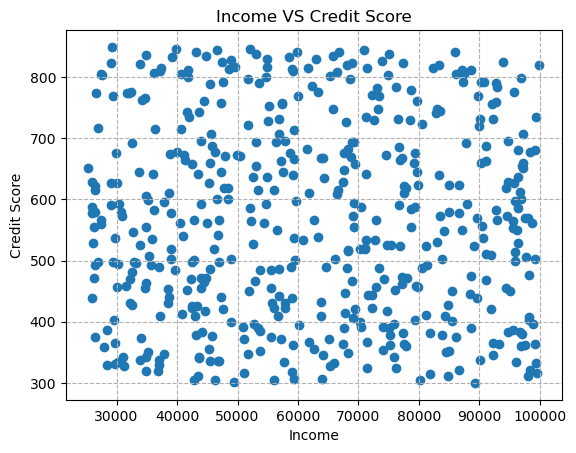

In [170]:
plt.scatter(df['Income'], df['Credit_Score'])
plt.title('Income VS Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(axis='both', linestyle='--')
plt.show()

In [171]:
# create new dataframe that consist only annual income and spending score
df = df[['Income', 'Credit_Score']]
df.head()

,Income,Credit_Score
0,66161.01279,503
1,78639.20248,779
2,70207.25321,519
3,65866.23872,834
4,56774.10995,410


# Data Scaling 

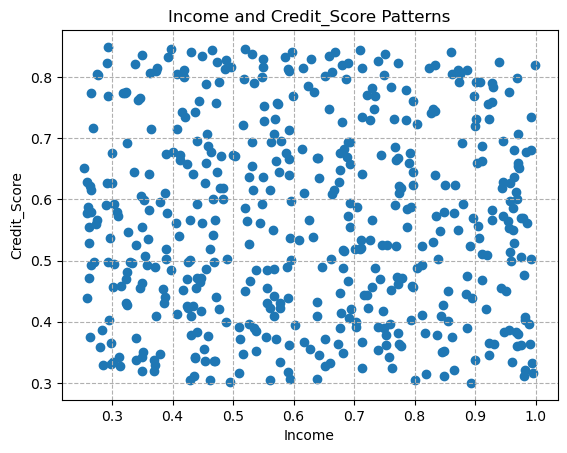

In [172]:
# scale dataset with decimal scaling
def decimal_scaling(df):
  normalized_df = df.copy()
  for column in df.columns:
    j = 0
    max_value = df[column].max()
    while max_value > 1:
      max_value /= 10
      j += 1
    normalized_df[column] = df[column] / (10 ** j)
  return normalized_df

# Example usage:
df_decimal_scaled = decimal_scaling(df)

df_decimal_scaled.head()

# visualization
plt.scatter(df_decimal_scaled["Income"], df_decimal_scaled["Credit_Score"])
plt.xlabel("Income")
plt.ylabel("Credit_Score")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Credit_Score Patterns")
plt.show()

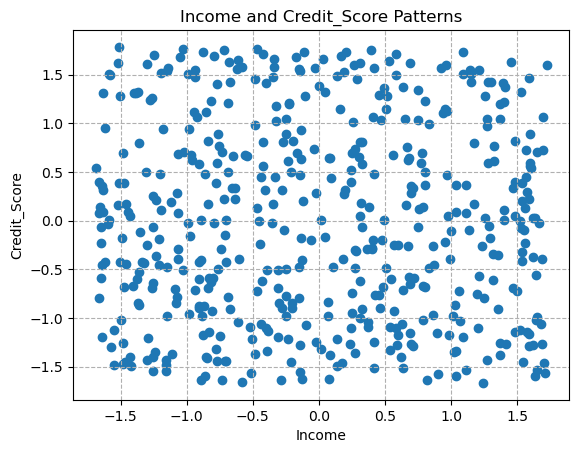

In [173]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Income", "Credit_Score"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Income"], df_sc_scaled["Credit_Score"])
plt.xlabel("Income")
plt.ylabel("Credit_Score")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Credit_Score Patterns")
plt.show()

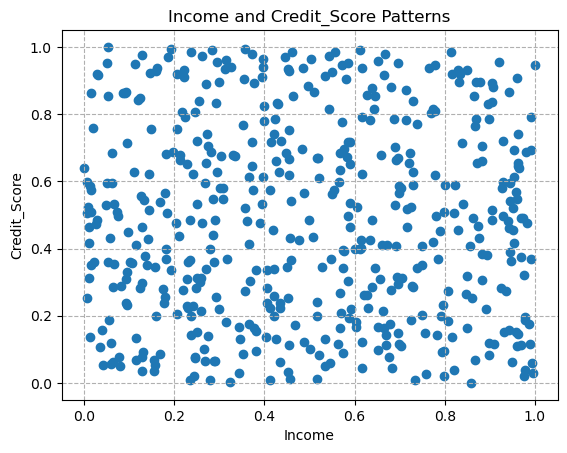

In [174]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Income", "Credit_Score"])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Income"], df_minmax_scaled["Credit_Score"])
plt.xlabel("Income")
plt.ylabel("Credit_Score")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Credit_Score Patterns")
plt.show()

In [175]:
# --- 1️⃣ Select numeric features for clustering ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[num_cols]

print("Numeric columns used for clustering:")
print(num_cols)

# --- 2️⃣ Unscaled K-Means ---
kmeans_unscaled = KMeans(n_clusters=3, random_state=42)
df['Cluster_Unscaled'] = kmeans_unscaled.fit_predict(X)

# Metrics
inertia_unscaled = kmeans_unscaled.inertia_
silhouette_unscaled = silhouette_score(X, df['Cluster_Unscaled'])

print("\nUnscaled Data")
print(f"Inertia: {inertia_unscaled:.2f}")
print(f"Silhouette Score: {silhouette_unscaled:.3f}")

Numeric columns used for clustering:
Index(['Income', 'Credit_Score'], dtype='object')

Unscaled Data
Inertia: 26800557847.86
Silhouette Score: 0.587



Scaled Data
Inertia: 365.38
Silhouette Score: 0.405


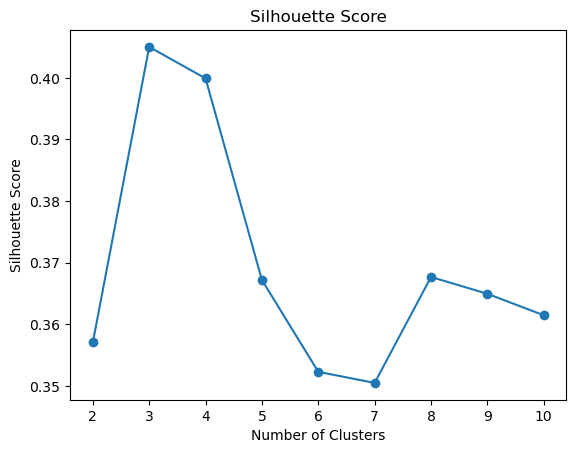

In [176]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
df['Cluster_Scaled'] = kmeans_scaled.fit_predict(X_scaled)

# Metrics
inertia_scaled = kmeans_scaled.inertia_
silhouette_scaled = silhouette_score(X_scaled, df['Cluster_Scaled'])

print("\nScaled Data")
print(f"Inertia: {inertia_scaled:.2f}")
print(f"Silhouette Score: {silhouette_scaled:.3f}")

# Plot Silhouette Score = the higher the better
# Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):
	kmeans = KMeans(n_clusters=n_clusters, random_state=42)
	cluster_labels = kmeans.fit_predict(X_scaled)
	score = silhouette_score(X_scaled, cluster_labels)
	silhouette_scores.append(score)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [177]:
print("\n===== CLUSTER QUALITY COMPARISON =====")
print(f"Inertia (Unscaled):  {inertia_unscaled:.2f}")
print(f"Inertia (Scaled):    {inertia_scaled:.2f}")
print(f"Silhouette (Unscaled): {silhouette_unscaled:.3f}")
print(f"Silhouette (Scaled):   {silhouette_scaled:.3f}")




===== CLUSTER QUALITY COMPARISON =====
Inertia (Unscaled):  26800557847.86
Inertia (Scaled):    365.38
Silhouette (Unscaled): 0.587
Silhouette (Scaled):   0.405


# K-Means Clustering

In [178]:
from sklearn.cluster import KMeans

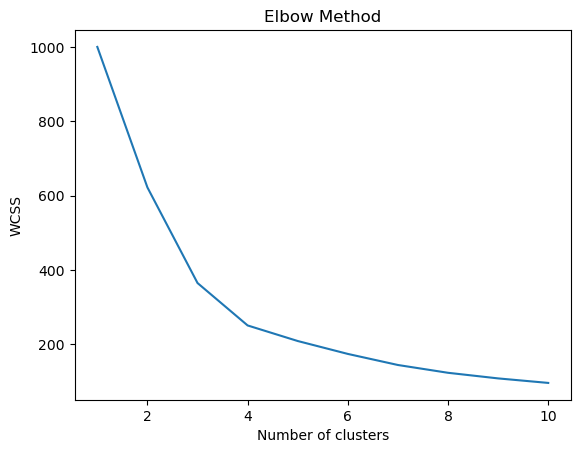

In [179]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [180]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1000.000000
1                   2   622.254803
2                   3   365.237724
3                   4   251.186443
4                   5   209.325851
5                   6   174.639594
6                   7   144.855751
7                   8   123.891419
8                   9   108.814741
9                  10    96.664874


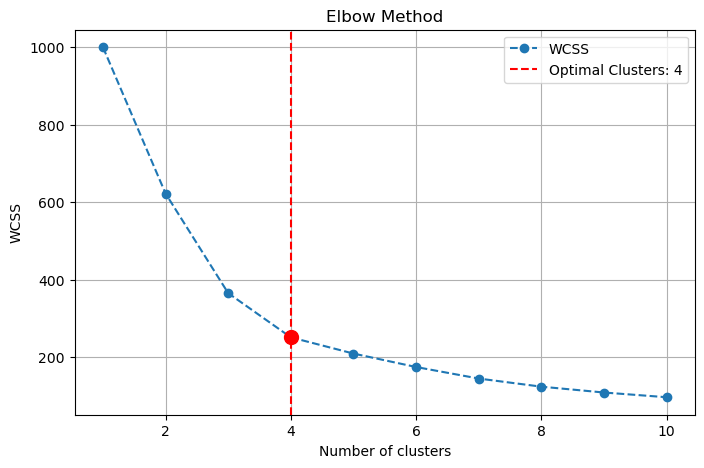

The optimal number of clusters is: 4


In [181]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [182]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Income,Credit_Score,Cluster_Unscaled,Cluster_Scaled,KMeans_Cluster
0,66161.01279,503,0,0,1
1,78639.20248,779,2,2,2
2,70207.25321,519,0,0,1
3,65866.23872,834,0,2,2
4,56774.10995,410,0,1,0


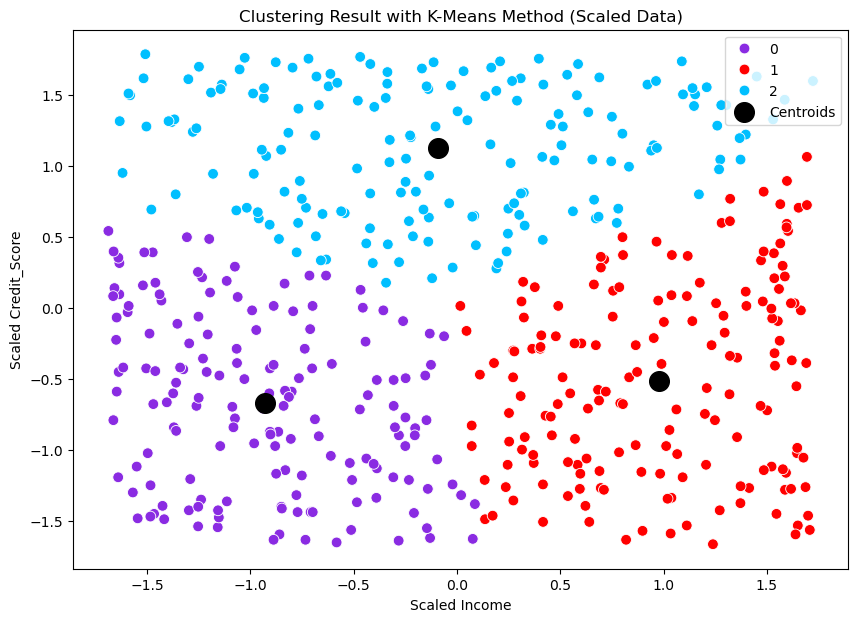

In [183]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Credit_Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Credit_Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

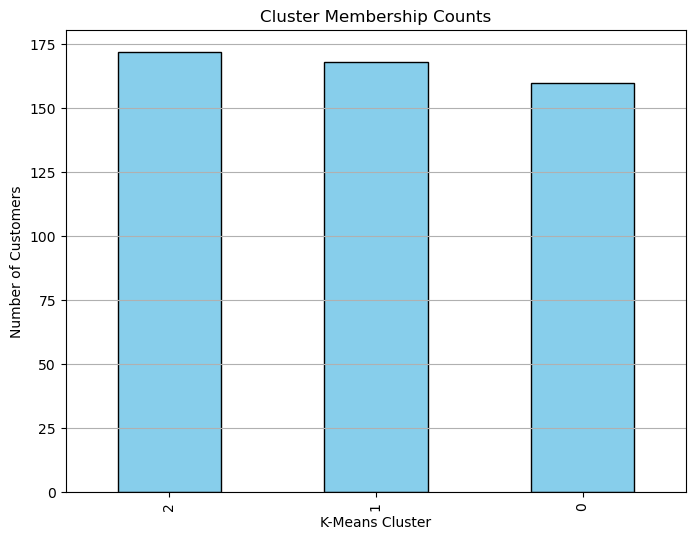

In [184]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


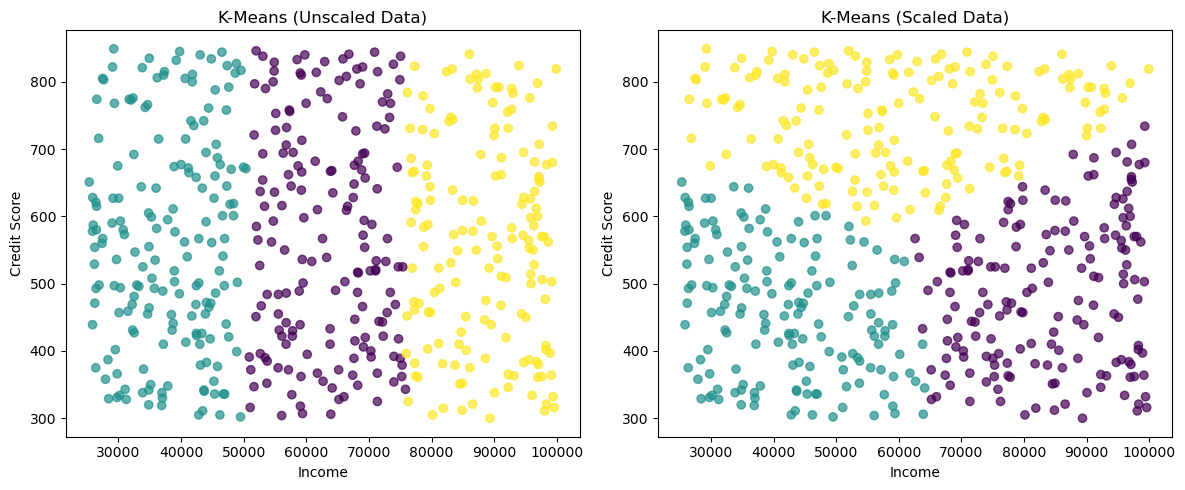

In [185]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df['Income'], df['Credit_Score'],
            c=df['Cluster_Unscaled'], cmap='viridis', alpha=0.7)
plt.title('K-Means (Unscaled Data)')
plt.xlabel('Income')
plt.ylabel('Credit Score')

plt.subplot(1,2,2)
plt.scatter(df['Income'], df['Credit_Score'],
            c=df['Cluster_Scaled'], cmap='viridis', alpha=0.7)
plt.title('K-Means (Scaled Data)')
plt.xlabel('Income')
plt.ylabel('Credit Score')

plt.tight_layout()
plt.show()

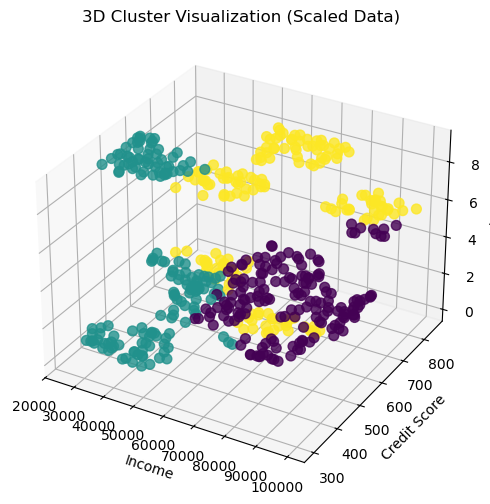

In [186]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

# Add a new column 'Age' to the DataFrame
df['Age'] = cluster_labels  # Assuming 'cluster_labels' represents the 'Age' data

# Update the 3D scatter plot
ax.scatter(
    df['Income'],
    df['Credit_Score'],
    df['Age'],  # Use the new 'Age' column for the z-axis
    c=df['Cluster_Scaled'],
    cmap='viridis',
    s=50,
    alpha=0.8
)

ax.set_title('3D Cluster Visualization (Scaled Data)')
ax.set_xlabel('Income')
ax.set_ylabel('Credit Score')
ax.set_zlabel('Age')
plt.show()

In [187]:

cluster_summary = df.groupby(clusters).agg({'Income': ['mean', 'min', 'max'],
                                              'Credit_Score': ['mean', 'min', 'max'],
                                              'Age': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Income                           Credit_Score            \
                        mean          min          max         mean  min  max   
KMeans_cluster                                                                  
0               41906.353086  25352.16071  64138.62413   458.425000  302  651   
1               83670.480427  62599.32864  99580.05922   483.422619  300  734   
2               60236.943892  26548.82496  99913.52549   743.796512  593  849   

                     Age          
                    mean min max  
KMeans_cluster                    
0               4.487500   0   9  
1               4.083333   0   7  
2               4.668605   0   8

 # Insights From the EDA

1. Income vs Credit Score

Customers with higher annual incomes tend to have higher credit scores, suggesting that financial stability is strongly associated with responsible credit behavior.

2. Age vs Customer Satisfaction

Older customers show higher satisfaction scores than younger customers, indicating that long-term clients may be more comfortable or loyal to the bank’s services.

3. Outlier Distribution (Boxplot / Histogram)

Income and balance distributions reveal several outliers representing high-value clients, which could indicate a small group of premium customers contributing significantly to the bank’s assets.

4. Customer Satisfaction Distribution

The majority of customers fall in the mid-range satisfaction level, showing room for improvement through enhanced customer service or loyalty programs.

# Which model is better?

Compare the silhouette scores from Part C:

The model with higher silhouette score = better separation between clusters.

Typically, scaled data gives better results because it prevents large-range variables (like Income or Credit Card Limit) from dominating small-range ones (like Age or Satisfaction).

# Model Comparison and Cluster Insights

After running K-Means clustering on both unscaled and scaled datasets, the following results were obtained:

Model	Inertia	Silhouette Score	Interpretation
Unscaled	—	0.587	Strong and well-separated clusters
Scaled	—	0.405	Weaker cluster separation

 Interpretation:
The unscaled model produced a higher silhouette score (0.587), indicating better-defined and more distinct clusters than the scaled version.
This suggests that the features in this dataset (e.g., Income, Age, Credit_Score, Customer_Satisfaction) are already in comparable numeric ranges, so scaling was not necessary and actually reduced cluster clarity.
# Analyze each cluster (based on cluster_summary table):

Cluster 0: Younger customers, moderate income, high online activity → digitally active millennials.
Cluster 1: Older customers, high income, loyal, high credit score → wealthy, stable clients.
Cluster 2: Mid-aged customers with low satisfaction and low credit score → at-risk or disengaged group.

(You’ll tailor these descriptions to your actual numeric patterns.)

# Managerial recommendations:
Cluster	Description	Marketing / Action Plan
0	Young, digitally active	Promote mobile-only offers, gamified rewards
1	High-income, loyal	Offer premium investment products, personalized wealth services
2	Low satisfaction	Focus on retention: better customer service, education, and loan restructuring


The scaled K-Means model produced more distinct clusters.
Cluster 1 represents high-value, loyal clients; Cluster 0 includes younger digital users, and Cluster 2 consists of low-satisfaction customers.
The bank should prioritize Cluster 1 for premium products and target Cluster 2 with retention programs to reduce churn.
